# CS765 PROJECT

### Demo from https://github.com/Axelrod-Python/Axelrod

In [1]:
# install the requirements.txt, if you have an error install axelrod-dojo first, with instructions below
# pip install -r requirements.txt

In [2]:
import axelrod as axl
import matplotlib.pyplot as plt

In [3]:
players = [s() for s in axl.demo_strategies]  # Create players

# Strategies from the demo:
axl.demo_strategies

[axelrod.strategies.cooperator.Cooperator,
 axelrod.strategies.defector.Defector,
 axelrod.strategies.titfortat.TitForTat,
 axelrod.strategies.grudger.Grudger,
 axelrod.strategies.rand.Random]

In [4]:
tournament = axl.Tournament(players, turns=4, repetitions=2, seed=42)  # Create a tournament
# results = tournament.play(processes=0)  # Play the tournament
results = tournament.play(processes=0)  # Play the tournament Multicore


Analysing: 100%|██████████| 25/25 [00:00<00:00, 37.08it/s]


In [5]:
results.ranked_names

['Defector', 'Random: 0.5', 'Grudger', 'Tit For Tat', 'Cooperator']

In [6]:
plot = axl.Plot(results)


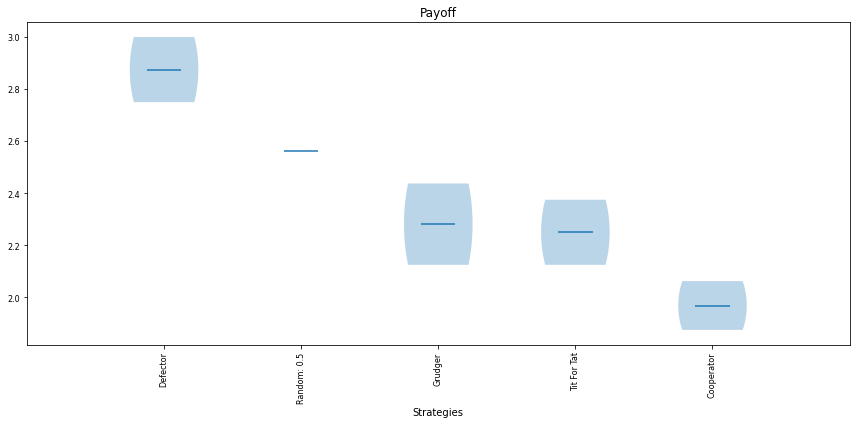

In [7]:
# set up plot labels
_, ax = plt.subplots()
ax.set_title('Payoff')
ax.set_xlabel('Strategies')
# draw the plot
p = plot.boxplot(ax=ax)

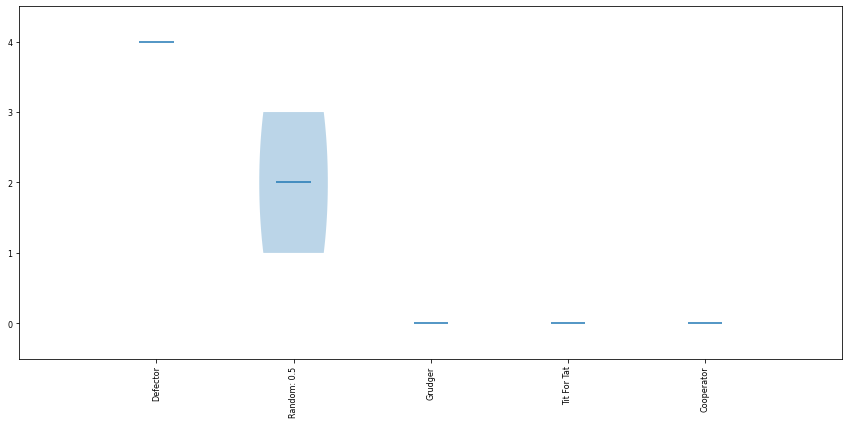

In [8]:
# Visualising the distributions of wins
p = plot.winplot()

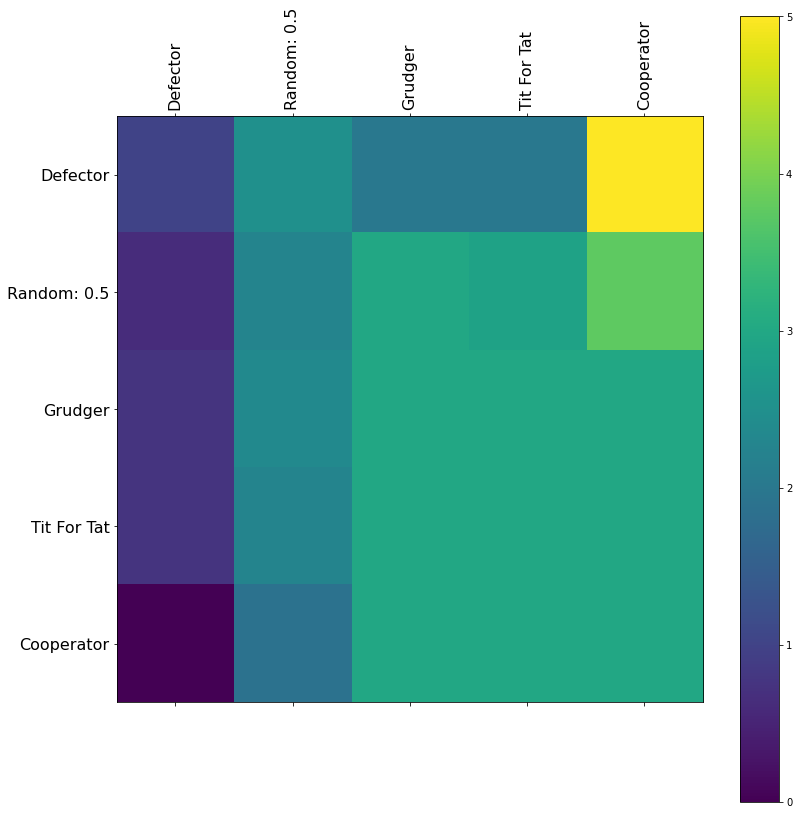

In [9]:
# Visualising the payoff matrix
p = plot.payoff()

### Axelrod Dojo
To install axelrod dojo: <br>
>
`cd axelrod-dojo-master` <br>
`python setup.py develop` <br> 
>
You can also try: <br>
>
`pip install axelrod_dojo` <br>
>
but for me it didn't work, I recieved error, probably because I'm on python 3.10

In [10]:
import axelrod_dojo as dojo

#### Tutorial from Axelrod-Dojo

In [99]:
#opponents = [axl.TitForTat(), axl.Alternator(), axl.Defector()]
opponents = [s() for s in axl.short_run_time_strategies[:10]]
opponents


[ALLCorALLD,
 AON2,
 Adaptive Pavlov 2006,
 Adaptive Pavlov 2011,
 Adaptive,
 Adaptive Tit For Tat: 0.5,
 AdaptorBrief,
 AdaptorLong,
 Aggravater,
 Alexei: (D,)]

In [133]:
# We are now going to prepare the training algorithm. First of all, we need to prepare the 
# objective of our strategy. 
# In this case we will aim to maximise score in a match with 10 turns over 1 repetition:

objective = dojo.prepare_objective(name="score", turns=100, repetitions=10)

In [134]:
# The algorithm we are going to use is a genetic algorithm which requires a population of individuals. 
# Let us set up the inputs:

params_class = axl.EvolvableFSMPlayer
params_kwargs = {"num_states": 50, "seed":35678845}


In [135]:
population = dojo.Population(player_class=params_class,
                                params_kwargs=params_kwargs,
                                size=20,
                                objective=objective,
                                output_filename="training_output.csv",
                                opponents=opponents,
                                mutation_probability=.25
                            )

In [136]:
generations = 10
population.run(generations)


Scoring Generation 1
Generation 1 | Best Score: 1.4529
Scoring Generation 2
Generation 2 | Best Score: 1.5814999999999997
Scoring Generation 3
Generation 3 | Best Score: 2.2532
Scoring Generation 4
Generation 4 | Best Score: 2.1916
Scoring Generation 5
Generation 5 | Best Score: 2.4781000000000004
Scoring Generation 6
Generation 6 | Best Score: 2.5807999999999995
Scoring Generation 7
Generation 7 | Best Score: 2.6567999999999996
Scoring Generation 8
Generation 8 | Best Score: 2.6233999999999997
Scoring Generation 9
Generation 9 | Best Score: 2.5822999999999996
Scoring Generation 10
Generation 10 | Best Score: 2.6938


In [137]:
population.population

[EvolvableFSMPlayer: ((0, C, 47, D), (0, D, 19, C), (1, C, 14, C), (1, D, 27, C), (2, C, 33, C), (2, D, 31, D), (3, C, 4, D), (3, D, 30, C), (4, C, 39, D), (4, D, 24, C), (5, C, 29, D), (5, D, 17, D), (6, C, 2, D), (6, D, 3, C), (7, C, 26, D), (7, D, 3, C), (8, C, 42, D), (8, D, 46, C), (9, C, 28, C), (9, D, 37, C), (10, C, 26, D), (10, D, 41, C), (11, C, 34, C), (11, D, 39, D), (12, C, 22, D), (12, D, 46, D), (13, C, 48, C), (13, D, 15, D), (14, C, 15, D), (14, D, 14, D), (15, C, 27, C), (15, D, 39, C), (16, C, 10, D), (16, D, 16, C), (17, C, 2, C), (17, D, 39, D), (18, C, 34, D), (18, D, 46, D), (19, C, 45, C), (19, D, 35, D), (20, C, 9, D), (20, D, 1, D), (21, C, 17, D), (21, D, 46, C), (22, C, 1, C), (22, D, 48, C), (23, C, 42, C), (23, D, 23, C), (24, C, 28, C), (24, D, 26, C), (25, C, 18, D), (25, D, 49, C), (26, C, 42, C), (26, D, 46, C), (27, C, 8, C), (27, D, 22, D), (28, C, 31, D), (28, D, 38, C), (29, C, 13, D), (29, D, 28, C), (30, C, 10, D), (30, D, 40, D), (31, C, 30, D),

In [138]:
GA_player = population.population[0]
GA_player.__repr__()

'EvolvableFSMPlayer: ((0, C, 47, D), (0, D, 19, C), (1, C, 14, C), (1, D, 27, C), (2, C, 33, C), (2, D, 31, D), (3, C, 4, D), (3, D, 30, C), (4, C, 39, D), (4, D, 24, C), (5, C, 29, D), (5, D, 17, D), (6, C, 2, D), (6, D, 3, C), (7, C, 26, D), (7, D, 3, C), (8, C, 42, D), (8, D, 46, C), (9, C, 28, C), (9, D, 37, C), (10, C, 26, D), (10, D, 41, C), (11, C, 34, C), (11, D, 39, D), (12, C, 22, D), (12, D, 46, D), (13, C, 48, C), (13, D, 15, D), (14, C, 15, D), (14, D, 14, D), (15, C, 27, C), (15, D, 39, C), (16, C, 10, D), (16, D, 16, C), (17, C, 2, C), (17, D, 39, D), (18, C, 34, D), (18, D, 46, D), (19, C, 45, C), (19, D, 35, D), (20, C, 9, D), (20, D, 1, D), (21, C, 17, D), (21, D, 46, C), (22, C, 1, C), (22, D, 48, C), (23, C, 42, C), (23, D, 23, C), (24, C, 28, C), (24, D, 26, C), (25, C, 18, D), (25, D, 49, C), (26, C, 42, C), (26, D, 46, C), (27, C, 8, C), (27, D, 22, D), (28, C, 31, D), (28, D, 38, C), (29, C, 13, D), (29, D, 28, C), (30, C, 10, D), (30, D, 40, D), (31, C, 30, D),

In [139]:
players = opponents + [GA_player]
players



[ALLCorALLD,
 AON2,
 Adaptive Pavlov 2006,
 Adaptive Pavlov 2011,
 Adaptive,
 Adaptive Tit For Tat: 0.5,
 AdaptorBrief,
 AdaptorLong,
 Aggravater,
 Alexei: (D,),
 EvolvableFSMPlayer: ((0, C, 47, D), (0, D, 19, C), (1, C, 14, C), (1, D, 27, C), (2, C, 33, C), (2, D, 31, D), (3, C, 4, D), (3, D, 30, C), (4, C, 39, D), (4, D, 24, C), (5, C, 29, D), (5, D, 17, D), (6, C, 2, D), (6, D, 3, C), (7, C, 26, D), (7, D, 3, C), (8, C, 42, D), (8, D, 46, C), (9, C, 28, C), (9, D, 37, C), (10, C, 26, D), (10, D, 41, C), (11, C, 34, C), (11, D, 39, D), (12, C, 22, D), (12, D, 46, D), (13, C, 48, C), (13, D, 15, D), (14, C, 15, D), (14, D, 14, D), (15, C, 27, C), (15, D, 39, C), (16, C, 10, D), (16, D, 16, C), (17, C, 2, C), (17, D, 39, D), (18, C, 34, D), (18, D, 46, D), (19, C, 45, C), (19, D, 35, D), (20, C, 9, D), (20, D, 1, D), (21, C, 17, D), (21, D, 46, C), (22, C, 1, C), (22, D, 48, C), (23, C, 42, C), (23, D, 23, C), (24, C, 28, C), (24, D, 26, C), (25, C, 18, D), (25, D, 49, C), (26, C, 42, 

In [140]:
tournament = axl.Tournament(players, turns=100, repetitions=100, seed=42)  # Create a tournament
results = tournament.play(processes=0)  # Play the tournament

Analysing: 100%|██████████| 25/25 [00:01<00:00, 19.92it/s]


In [141]:
plot = axl.Plot(results)

In [143]:
for i in range(len(results.ranked_names)):
    results.ranked_names[i] = results.ranked_names[i].split(':')[0]
results.ranked_names



['AON2',
 'Adaptive Pavlov 2011',
 'Alexei',
 'Adaptive Tit For Tat',
 'AdaptorBrief',
 'Adaptive Pavlov 2006',
 'EvolvableFSMPlayer',
 'AdaptorLong',
 'Adaptive',
 'ALLCorALLD',
 'Aggravater']

In [144]:
for i in range(len(plot.players)):
    plot.players[i] = plot.players[i].split(':')[0]
plot.players

['ALLCorALLD',
 'AON2',
 'Adaptive Pavlov 2006',
 'Adaptive Pavlov 2011',
 'Adaptive',
 'Adaptive Tit For Tat',
 'AdaptorBrief',
 'AdaptorLong',
 'Aggravater',
 'Alexei',
 'EvolvableFSMPlayer']

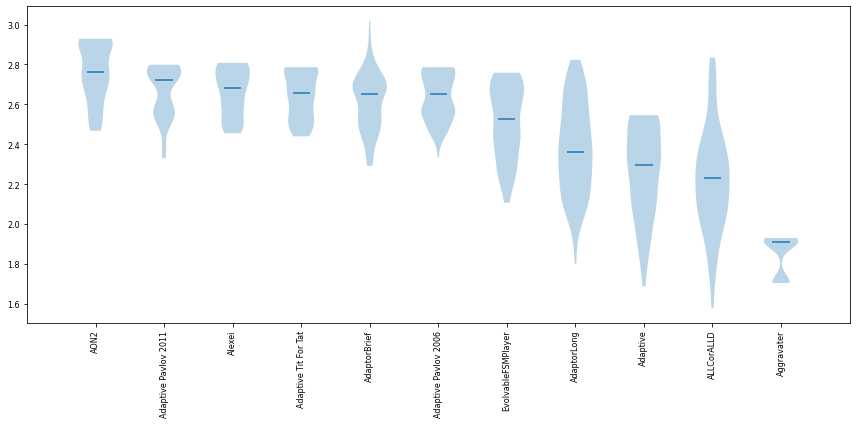

In [145]:
p = plot.boxplot()


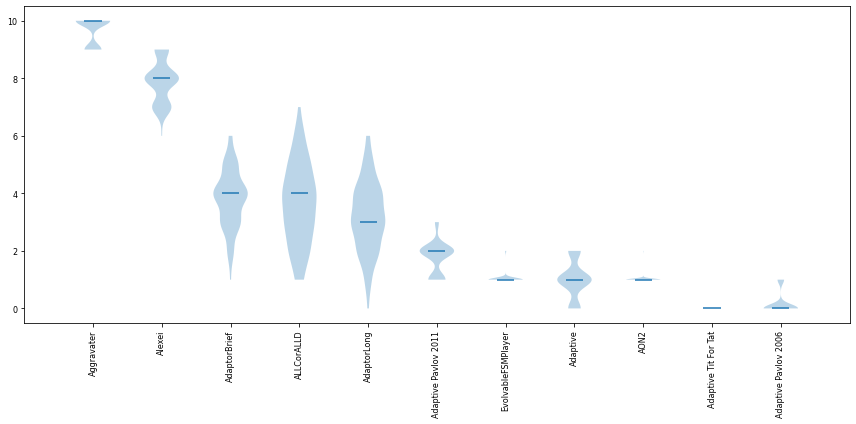

In [146]:
# Visualising the distributions of wins
p = plot.winplot()

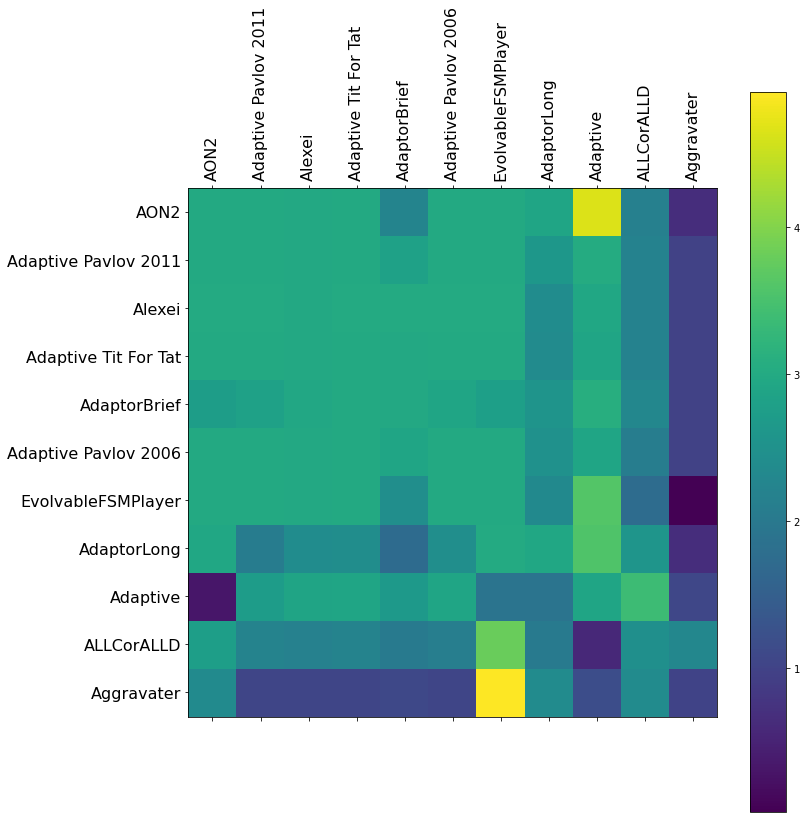

In [147]:
p = plot.payoff()

In [115]:
population.run(generations)

Scoring Generation 21
Generation 21 | Best Score: 2.6799999999999997
Scoring Generation 22
Generation 22 | Best Score: 2.68
Scoring Generation 23
Generation 23 | Best Score: 2.6399999999999997
Scoring Generation 24
Generation 24 | Best Score: 2.77
Scoring Generation 25
Generation 25 | Best Score: 2.76
Scoring Generation 26
Generation 26 | Best Score: 2.77
Scoring Generation 27
Generation 27 | Best Score: 2.6599999999999997
Scoring Generation 28
Generation 28 | Best Score: 2.77
Scoring Generation 29
Generation 29 | Best Score: 2.68
Scoring Generation 30
Generation 30 | Best Score: 2.68
Scoring Generation 31
Generation 31 | Best Score: 2.6599999999999997
Scoring Generation 32
Generation 32 | Best Score: 2.68
Scoring Generation 33
Generation 33 | Best Score: 2.7399999999999998
Scoring Generation 34
Generation 34 | Best Score: 2.77
Scoring Generation 35
Generation 35 | Best Score: 2.77
Scoring Generation 36
Generation 36 | Best Score: 2.77
Scoring Generation 37
Generation 37 | Best Score: 